In [26]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import *
from sklearn.linear_model import LinearRegression

In [47]:
data = pd.read_csv("processed_data.csv",index_col = 0).iloc[:,0]
data

index
2020-03-21      9.0
2020-03-22     29.0
2020-03-23     22.0
2020-03-24     12.0
2020-03-25     29.0
2020-03-26     24.0
2020-03-27     18.0
2020-03-28     18.0
2020-03-29     18.0
2020-03-30     26.0
2020-03-31     44.0
2020-04-01     25.0
2020-04-02     30.0
2020-04-03     46.0
2020-04-04     46.0
2020-04-05     72.0
2020-04-06     15.0
2020-04-07     29.0
2020-04-08     18.0
2020-04-09     46.0
2020-04-10     48.0
2020-04-11     48.0
2020-04-12     68.0
2020-04-13     26.0
2020-04-14     54.0
2020-04-15     66.0
2020-04-16    107.0
2020-04-17     36.0
2020-04-18     53.0
2020-04-19     37.0
2020-04-20     18.0
2020-04-21      7.0
2020-04-22     28.0
2020-04-23     41.0
2020-04-24     26.0
2020-04-25     41.0
2020-04-26     19.0
2020-04-27     13.0
2020-04-28     22.0
2020-04-29     21.0
2020-04-30     23.0
2020-05-01     29.0
2020-05-02     15.0
2020-05-03      5.0
2020-05-04      7.0
2020-05-05      8.0
2020-05-06     13.0
2020-05-07     33.0
2020-05-08     14.0
2020-05-09    

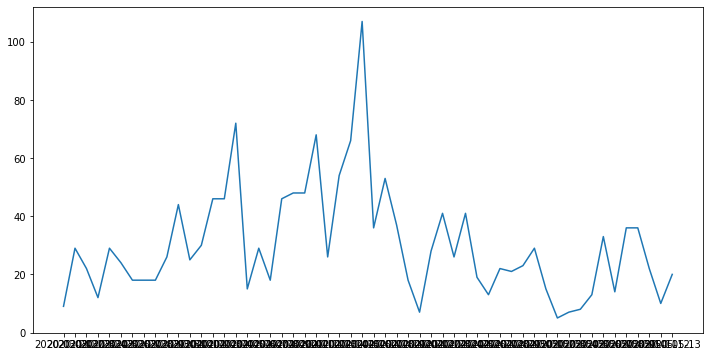

In [48]:
plt.figure(figsize = (12,6))
plt.plot(data)

In [49]:
test_period = 36

train = data.iloc[:-test_period]
test = data.iloc[-test_period:]

In [50]:
trend_removed = train.diff()

In [51]:
trend_removed.shape

(18,)

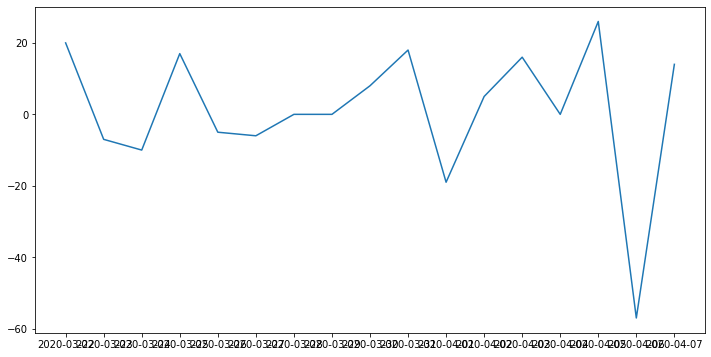

In [52]:
plt.figure(figsize = (12,6))
plt.plot(trend_removed)

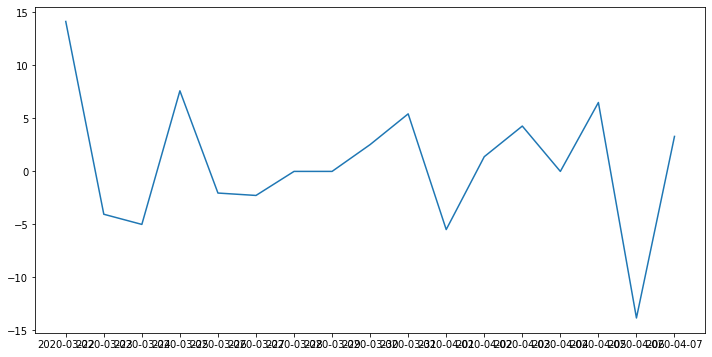

In [53]:
t_train = np.arange(len(train)).reshape(-1,1)
trend_removed = trend_removed / ((t_train+1)**(1/2)).reshape(-1)

plt.figure(figsize = (12,6))
plt.plot(trend_removed)

In [54]:
trend_removed = trend_removed.iloc[5:]

In [61]:
n_bins = 10
bins = np.linspace(trend_removed.min(), trend_removed.max(), n_bins)
binned = np.digitize(trend_removed, bins)

binned_series = pd.Series(binned, index = trend_removed.index)
print(binned_series)

index
2020-03-26     6
2020-03-27     6
2020-03-28     7
2020-03-29     7
2020-03-30     8
2020-03-31     9
2020-04-01     4
2020-04-02     7
2020-04-03     9
2020-04-04     7
2020-04-05    10
2020-04-06     1
2020-04-07     8
dtype: int64


In [56]:
bin_means = {}

for binn in range(1,n_bins+1):
    bin_means[binn] = trend_removed[binned == binn].mean()

In [63]:
lagged_list = []
for s in range(13):
    lagged_list.append(binned_series.shift(s))
    print(binned_series.shift(s))
lagged_frame = pd.concat(lagged_list,1).dropna()

train_X = lagged_frame.iloc[:,1:]
train_y = lagged_frame.iloc[:,0]

index
2020-03-26     6
2020-03-27     6
2020-03-28     7
2020-03-29     7
2020-03-30     8
2020-03-31     9
2020-04-01     4
2020-04-02     7
2020-04-03     9
2020-04-04     7
2020-04-05    10
2020-04-06     1
2020-04-07     8
dtype: int64
index
2020-03-26     NaN
2020-03-27     6.0
2020-03-28     6.0
2020-03-29     7.0
2020-03-30     7.0
2020-03-31     8.0
2020-04-01     9.0
2020-04-02     4.0
2020-04-03     7.0
2020-04-04     9.0
2020-04-05     7.0
2020-04-06    10.0
2020-04-07     1.0
dtype: float64
index
2020-03-26     NaN
2020-03-27     NaN
2020-03-28     6.0
2020-03-29     6.0
2020-03-30     7.0
2020-03-31     7.0
2020-04-01     8.0
2020-04-02     9.0
2020-04-03     4.0
2020-04-04     7.0
2020-04-05     9.0
2020-04-06     7.0
2020-04-07    10.0
dtype: float64
index
2020-03-26    NaN
2020-03-27    NaN
2020-03-28    NaN
2020-03-29    6.0
2020-03-30    6.0
2020-03-31    7.0
2020-04-01    7.0
2020-04-02    8.0
2020-04-03    9.0
2020-04-04    4.0
2020-04-05    7.0
2020-04-06    9.0
20

In [64]:
train_X.head()

,1,2,3,4,5,6,7,8,9,10,11,12
index,,,,,,,,,,,,
2020-04-07,1.0,10.0,7.0,9.0,7.0,4.0,9.0,8.0,7.0,7.0,6.0,6.0


In [65]:
train_y.head()

index
2020-04-07    8
Name: 0, dtype: int64

In [66]:
def get_mean_from_class(prediction):
    
    return(bin_means[prediction[0]])

In [67]:
model = GaussianNB()

In [68]:
model.fit(train_X, train_y)

GaussianNB()

In [69]:
pred_insample = model.predict(train_X)
pred_insample = pd.DataFrame(pred_insample, index = train_y.index)

resulting_prediction = pd.Series(np.nan, index = train_y.index)
for row in range(len(pred_insample)):
    resulting_prediction.iloc[row] = get_mean_from_class(pred_insample.values[row])

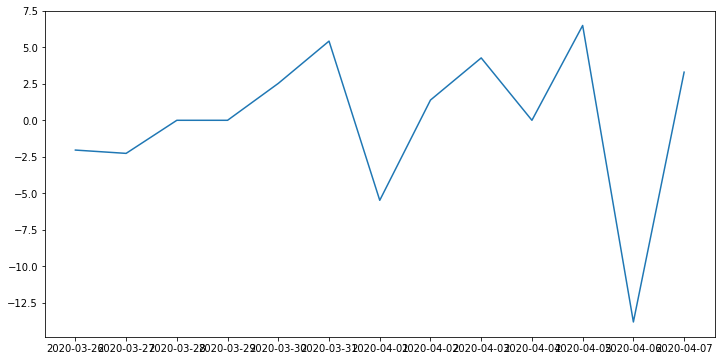

In [70]:
plt.figure(figsize = (12,6))
plt.plot(trend_removed)
plt.plot(resulting_prediction)

In [71]:
prediction_frame = pd.DataFrame(np.nan, index = test.index, columns = range(train_X.shape[1]))
predictions = pd.Series(index = test.index)

prediction_frame.iloc[0,1:] = train_X.iloc[-1,:-1].values
prediction_frame.iloc[0,0] = train_y.iloc[-1]

In [72]:
for i in range(len(test)):
    pred = model.predict(prediction_frame.iloc[i,:].values.reshape(1,-1))
    pred_num = get_mean_from_class(pred.reshape(-1))
    predictions.iloc[i] = pred_num
    try:
        prediction_frame.iloc[i+1,1:] = prediction_frame.iloc[i,:-1].values
        prediction_frame.iloc[i+1,0] = pred[0]
    except:
        pass

In [73]:
trend_test = np.arange(len(train),len(train)+len(test)).reshape(-1,1)

final_prediction = predictions.cumsum()* ((trend_test+1)**(1/2)).reshape(-1)+train.iloc[-1]

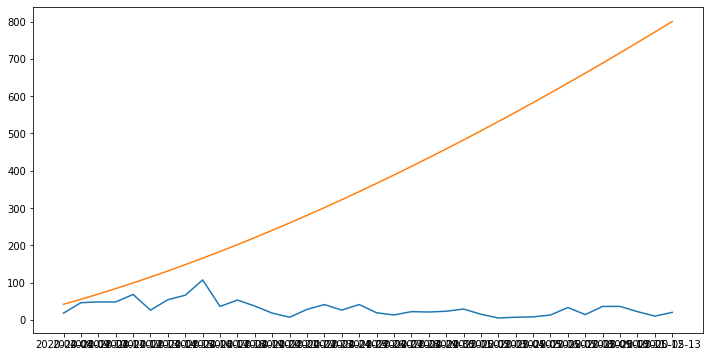

In [74]:
plt.figure(figsize = (12,6))
plt.plot(test)
plt.plot(final_prediction)

In [75]:
np.sqrt(np.mean((test-final_prediction)**2))

421.4025529100815